In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm

Using TensorFlow backend.


In [0]:

SIZE=320

In [4]:
noisy_data=[]
path1="/content/drive/My Drive/Denoising/train"
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)
    img=cv2.resize(img,(SIZE,SIZE))
    noisy_data.append(img_to_array(img))

100%|██████████| 144/144 [00:48<00:00,  3.05it/s]


In [5]:
clean_data=[]
path2="/content/drive/My Drive/Denoising/train_cleaned"
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)
    img=cv2.resize(img,(SIZE,SIZE))
    clean_data.append(img_to_array(img))

100%|██████████| 144/144 [00:32<00:00,  4.90it/s]


In [0]:
noisy_train=np.reshape(noisy_data,(len(noisy_data),SIZE,SIZE,1))
noisy_train=noisy_train.astype('float32')/255.

clean_train=np.reshape(clean_data,(len(clean_data),SIZE,SIZE,1))
clean_train=clean_train.astype('float32')/255.

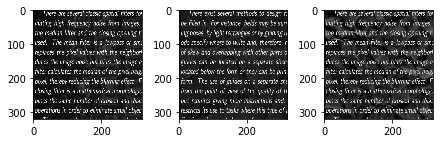

In [7]:
plt.figure(figsize=(10,2))
for i in range(1,4):
    ax=plt.subplot(1,4,i)
    plt.imshow(noisy_train[i].reshape(SIZE,SIZE),cmap="binary")
plt.show()


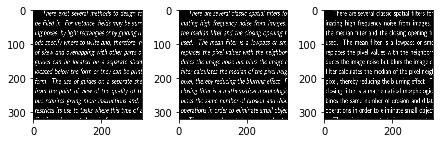

In [8]:
plt.figure(figsize=(10,2))
for i in range(1,4):
    ax=plt.subplot(1,4,i)
    plt.imshow(clean_train[i].reshape(SIZE,SIZE),cmap="binary")
plt.show()

In [9]:
from tensorflow.keras.layers import UpSampling2D

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(SIZE,SIZE,1)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1,(3,3),activation='relu',padding='same'))



model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:

model.summary()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(noisy_train,clean_train,test_size=0.2,random_state=3)

model.fit(x_train,y_train,epochs=200,batch_size=4,shuffle=True,verbose=1,validation_split=0.1)

print("Test_Accuracy:{:.2f}%".format(model.evaluate(np.array(x_test),np.array(y_test))[1]+100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 320, 320, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 8)       2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 8)         5

In [0]:
model.save('Denoising.model')


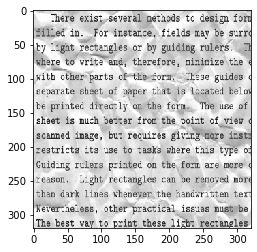

In [0]:
x_test_0 = x_test[10] * 255.0
x_test_0 = x_test_0.reshape(320,320)
plt.imshow(x_test_0,cmap="gray")

